In [1]:
#PCA
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
data = {'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
       'Weight': [70, 65, 80, 75, 60, 72, 68, 77, 62, 58],
       'Age': [17, 16, 18, 25, 28, 32, 24, 30, 19, 21],
       'Gender': [1, 1, 0, 1, 0, 0, 1, 0, 1, 0]}

df = pd.DataFrame(data)
print(df)

   Height  Weight  Age  Gender
0     170      70   17       1
1     165      65   16       1
2     180      80   18       0
3     175      75   25       1
4     160      60   28       0
5     172      72   32       0
6     168      68   24       1
7     177      77   30       0
8     162      62   19       1
9     158      58   21       0


In [3]:
X = df.drop('Gender', axis = 1)
y = df['Gender']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 0)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

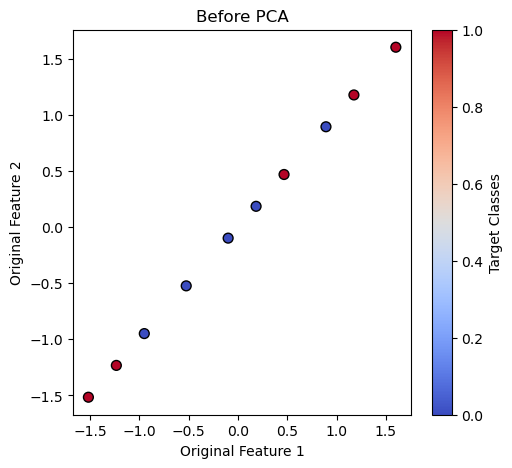

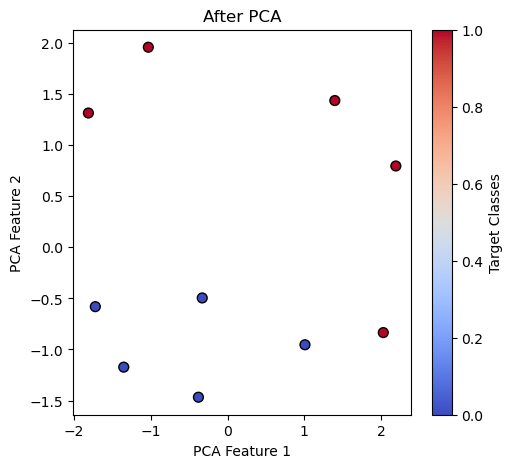

In [5]:
y_pred = model.predict(X_test)
y_numeric = pd.factorize(y)[0]

#plotting
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=y_numeric, cmap = 'coolwarm', edgecolor='k', s = 50)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA')
plt.colorbar(label = 'Target Classes')

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0],X_pca[:,1], c=y_numeric, cmap = 'coolwarm', edgecolor='k', s = 50)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('After PCA')
plt.colorbar(label = 'Target Classes')